In [2]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')

/Users/neway/software/anaconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


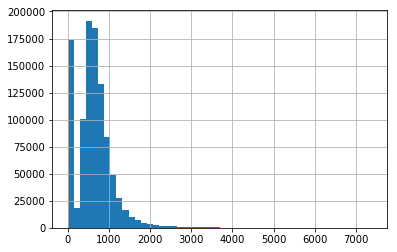

In [4]:
import seaborn as sns
%matplotlib inline

train_df['Customers'].hist(bins=50)

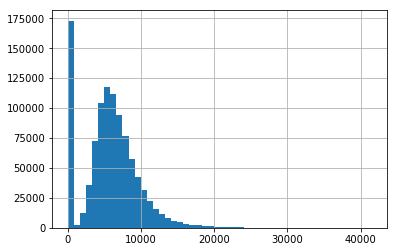

In [5]:
train_df['Sales'].hist(bins=50)

In [6]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


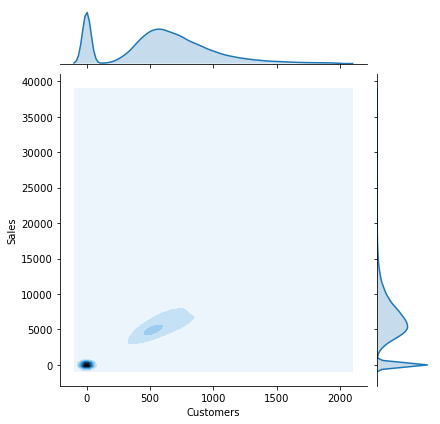

In [7]:
sample_df = train_df.loc[train_df['Customers'] < 2000].sample(100000)

sns.jointplot(sample_df['Customers'], sample_df['Sales'], kind="kde")

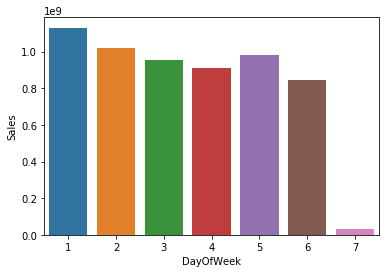

In [8]:
dayOfWeek_Sales = train_df.groupby('DayOfWeek')['Sales'].agg('sum').reset_index()

sns.barplot(x=dayOfWeek_Sales['DayOfWeek'], y=dayOfWeek_Sales['Sales'])

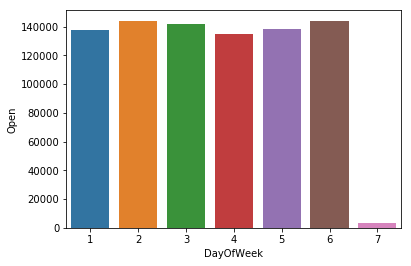

In [9]:
open_days = train_df.groupby('DayOfWeek')['Open'].agg('sum').reset_index()

sns.barplot(x=open_days['DayOfWeek'], y=open_days['Open'])

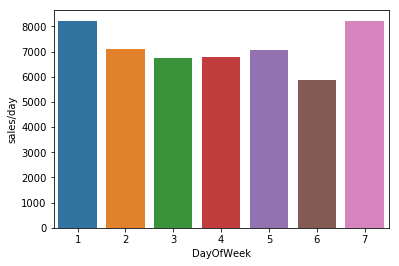

In [10]:
dayAvgSales = dayOfWeek_Sales.merge(open_days, how='inner', on = ['DayOfWeek'])
dayAvgSales['sales/day'] = dayAvgSales['Sales'] / dayAvgSales['Open']

sns.barplot(x=dayAvgSales['DayOfWeek'], y=dayAvgSales['sales/day'])

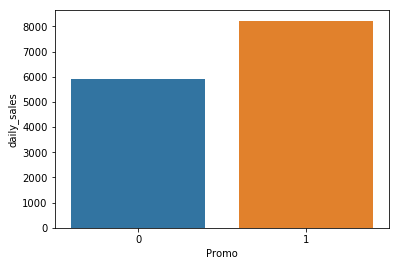

In [11]:
promo_sales = train_df.loc[train_df['Open'] == 1].groupby('Promo')['Sales'].agg(['sum', 'count']).reset_index()

promo_sales['daily_sales'] = promo_sales['sum']/promo_sales['count']

sns.barplot(x=promo_sales['Promo'], y=promo_sales['daily_sales'])

In [12]:
promo_day_sales = train_df.loc[train_df['Open'] == 1].groupby(['Promo', 'DayOfWeek'])['Sales'].agg(['sum', 'count']).reset_index()

promo_day_sales['sales/store'] = promo_day_sales['sum']/promo_day_sales['count']

promo_day_sales.rename(columns={'sum': 'total_sales', 'count': 'store_num'})


,Promo,DayOfWeek,total_sales,store_num,sales/store
0,0,1,375323829,60317,6222.521495
1,0,2,382090703,66843,5716.241087
2,0,3,368921884,65679,5617.044778
3,0,4,347985910,60521,5749.837412
4,0,5,421782843,66485,6344.030127
5,0,6,846317735,144058,5874.840238
6,0,7,29551433,3593,8224.723908
7,1,1,754879183,77243,9772.784369
8,1,2,638321227,77118,8277.201522
9,1,3,586040979,76257,7685.077816


In [13]:
promo_day_sales.head(20)

,Promo,DayOfWeek,sum,count,sales/store
0,0,1,375323829,60317,6222.521495
1,0,2,382090703,66843,5716.241087
2,0,3,368921884,65679,5617.044778
3,0,4,347985910,60521,5749.837412
4,0,5,421782843,66485,6344.030127
5,0,6,846317735,144058,5874.840238
6,0,7,29551433,3593,8224.723908
7,1,1,754879183,77243,9772.784369
8,1,2,638321227,77118,8277.201522
9,1,3,586040979,76257,7685.077816


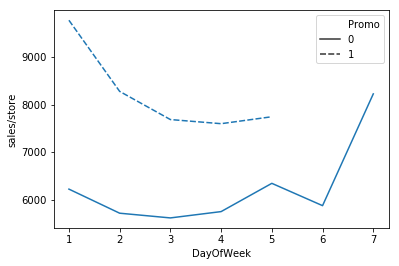

In [14]:
sns.lineplot(x=promo_day_sales['DayOfWeek'], y=promo_day_sales['sales/store'], style=promo_day_sales['Promo'])


In [15]:
train_df['StateHoliday'] = train_df['StateHoliday'].astype('str')

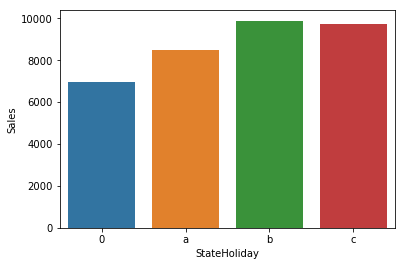

In [16]:
sales_df = train_df.loc[train_df['Open'] == 1]
stateHoliday_sale = sales_df.groupby('StateHoliday').agg({'Sales':'mean'}).reset_index()

sns.barplot(x=stateHoliday_sale['StateHoliday'], y=stateHoliday_sale['Sales'])


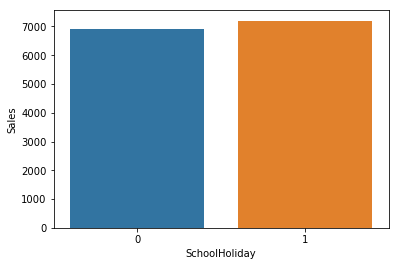

In [17]:
schoolholiday_sales = sales_df.groupby('SchoolHoliday').agg({'Sales': 'mean'}).reset_index()

sns.barplot(x='SchoolHoliday', y='Sales', data=schoolholiday_sales)

In [18]:
store_df = pd.read_csv('data/store.csv')

In [19]:
store_sales = sales_df.groupby('Store').agg({'Sales':'mean'}).reset_index()

In [20]:
store_df = store_df.merge(store_sales, on='Store')

In [21]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
738,739,d,c,2770.0,6.0,2008.0,1,22.0,2011.0,"Jan,Apr,Jul,Oct",9557.665595
910,911,a,c,16490.0,NaN,NaN,0,NaN,NaN,NaN,9884.908163
818,819,a,c,720.0,10.0,2014.0,0,NaN,NaN,NaN,6091.100765
191,192,d,c,2770.0,3.0,2008.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",9016.834405
683,684,d,c,680.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct",7721.366559
1089,1090,a,a,330.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",6453.071795
871,872,a,c,3860.0,9.0,2014.0,1,23.0,2015.0,"Mar,Jun,Sept,Dec",8536.406932
1067,1068,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct",4441.536680
696,697,d,a,3780.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10656.173299
755,756,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",16574.816431


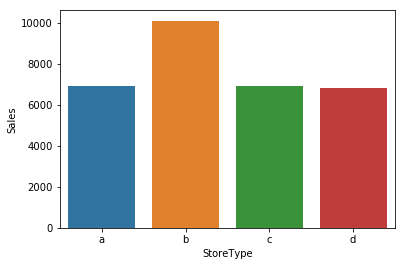

In [22]:
storeType_sales = store_df.groupby('StoreType').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='StoreType', y='Sales', data=storeType_sales)

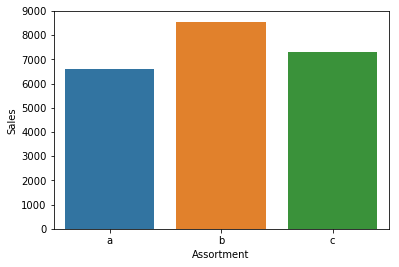

In [23]:
assortment_sales = store_df.groupby('Assortment').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='Assortment', y='Sales', data=assortment_sales)

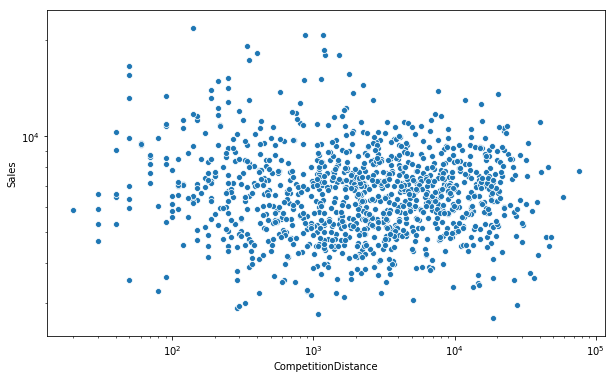

In [24]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(x='CompetitionDistance', y='Sales', data=store_df.loc[store_df['CompetitionDistance'] > 0])

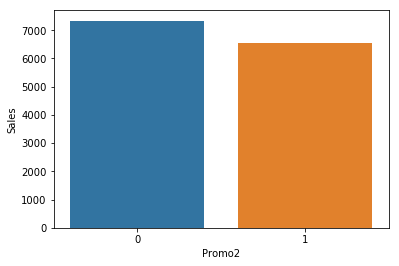

In [25]:
promo2_sales = store_df.groupby('Promo2').agg({'Sales':'mean'}).reset_index()

sns.barplot(x='Promo2', y='Sales', data=promo2_sales)


In [26]:
pandas_profiling.ProfileReport(store_df)



NameError: name 'pandas_profiling' is not defined

In [27]:
test_df = pd.read_csv('data/test.csv')

In [28]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### 基准模型

In [29]:
predict_df = train_df.groupby(['Store', 'DayOfWeek', 'Open', 'Promo']).agg({'Sales': 'mean'}).reset_index()

predict_df.sample(10)

,Store,DayOfWeek,Open,Promo,Sales
17873,853,1,1,1,12621.380282
14789,705,6,0,0,0.000000
4805,229,3,0,1,0.000000
2175,104,3,0,1,0.000000
9128,436,3,0,0,0.000000
18117,864,4,0,1,0.000000
866,42,2,0,0,0.000000
19681,938,4,1,0,7895.732143
16849,804,1,1,1,5904.263158
21625,1030,4,0,1,0.000000


In [32]:
val_df = train_df.loc[train_df['Date'] > '2015-06-18']

val_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [34]:
val_result = val_df.merge(predict_df, how = 'left', on=['Store', 'DayOfWeek', 'Open', 'Promo'], suffixes=['', '_pred'])

val_result.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_pred
0,1,5,2015-07-31,5263,555,1,1,0,1,5145.283582
1,2,5,2015-07-31,6064,625,1,1,0,1,5115.882353
2,3,5,2015-07-31,8314,821,1,1,0,1,8138.089552
3,4,5,2015-07-31,13995,1498,1,1,0,1,10275.776119
4,5,5,2015-07-31,4822,559,1,1,0,1,5308.835821


In [35]:
import numpy as np

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [36]:
val_rmspe = rmspe(val_result['Sales_pred'].values, val_result['Sales'].values)

0.13196871083010389

In [86]:
test_df = test_df.fillna(0)

test_df['Open'] = test_df['Open'].astype('int')

In [88]:
predict_result = test_df.merge(predict_df, how='left', on=['Store', 'DayOfWeek', 'Open', 'Promo'])

In [92]:
kaggle_result_csv = predict_result[['Id', 'Sales']].fillna(0)

In [95]:
kaggle_result_csv.to_csv('kaggle_baseline.csv', index=False)